# **APL SURP Python course** - Notebook 4 (blank version)

***If statements, for loops, xarray, and netCDF files***

*Created for the University of Washington Applied Physics Laboratory's Summer Undergraduate Research Program (SURP) 2025.*

For additional resources on Python basics, you can consult the following resources on the APL-SURP Python course website:
* Tutorials on Python fundamentals: https://uw-apl-surp.github.io/aplsurp-python/overview.html
* Complementary lessons on specific Python topics: https://uw-apl-surp.github.io/aplsurp-python/complementary_lessons.html

In [ ]:
import numpy as np                         # NumPy is an array and math library
import matplotlib.pyplot as plt            # Matplotlib is a visualization (plotting) library
import pandas as pd                        # Pandas lets us work with spreadsheet (.csv) data
from datetime import datetime, timedelta   # Datetime helps us work with dates and times

import xarray as xr                        # (NEW!) xarray handles multidimensional labeled data

## Part 1: `if` statements and `for` loops

### `if` statements

We can use logical operations to create **conditional actions** using the **`if` statement**.

If the boolean condition evaluates to `True`, then the lines inside the first block are executed.

Important: note the colons (**`:`**) and how the lines below each condition are indented using a `Tab` or two spaces on your keyboard (you can use a different number of spaces, but they have to be the same within a block).

```
if <CONDITION #1>:
  <ACTION>
  <ACTION>
  etc.
```


To create multiple paths for the code to follow, you can use an **`if-else` statement**.

If the first condition evaluates to `True`, then the lines inside the first block are executed.

If the first condition evaluates to `False`, then Python tests the second `elif` statement.

If all of the `if` and `elif` statements are `False`, then Python will finally execute the `else` statement.

```
if <CONDITION #1>:
  <ACTION>
  <ACTION>
  etc.
elif <CONDITION #2>:  (optional)
  <ACTION>
elif <CONDITION #3>:  (optional)
  <ACTION>
else <CONDITION #4>:  (optional)
  <ACTION>
```

First, a quick review of logical operations and booleans. ***What will these four print statements tell us?***

In [ ]:
current_temp = 70.0    # 70°F

print(current_temp >= 50)
print(current_temp >= 60)
print(current_temp >= 70)
print(current_temp >= 80)

***Now, try changing the value of `rain_chance` below and running the code. Do you understand the control flow?***

***What range of values for `rain_chance` will trigger the `else` statement ("I'm not sure what to do")?***

In [ ]:
rain_chance = 5    # i.e., a 5% chance of rain

if rain_chance >= 50:
  print('Ugh... I better bring an umbrella.')
elif rain_chance == 0:
  print('I definitely will not need an umbrella.')
elif rain_chance <= 20:
  print('I should be okay without an umbrella.')
else:
  print('I am not sure what to do.')

### `for` loops

Sometimes, we might want to perform an action multiple times, with small modifications. Coding makes this possible using **loops**!

A **`for` loop** has the following syntax:

```
for <ELEMENT> in <ITERABLE>:
  <ACTION>
  <ACTION>
  etc.
```
Here, `<ITERABLE>` can be a list, array, string, or other collection of elements. You can give `<ELEMENT>` any unique variable name, and that variable will typically *only* be used inside the loop.

***Run and consider the following examples:***

In [ ]:
countdown = [4,3,2,1]

for item in countdown:
  print(item)

In [ ]:
for character in 'floats':
  print(character)

In [ ]:
for num in np.arange(0,7,2):
  print(num)

In [ ]:
# These are the monthly average temperatures for Seattle from before
seattle_temps = np.array([40.0,40.6,44.2,48.4,54.9,60.2,66.2,66.7,60.5,52.0,44.5,39.6])

# This loop counts the number of months in which temps are warmer than 60°F:
warm_months = 0

for month in np.arange(0,12):
  this_month_temp = seattle_temps[month]
  if this_month_temp > 60.0:
    warm_months = warm_months + 1

print(f'On average, there are {warm_months} warm months in Seattle!')

***You already learned how to calculate the sum of an array of numbers using `np.sum()`.***

***Now, try to calculate the average Seattle annual temperature by writing a `for` loop below. There are at least two different ways to do this!***

In [ ]:
# You can reuse the variable "seattle_temps" defined earlier

# Write your code below:

# Finally, print the average temperature by adding it to the print() statement:
print('The average annual temperature is:', )

**Note:** `Numpy` arrays and `Pandas` DataFrames provide capabilities that often make the use of `if` and `for` statements unnecessary. Logical operations can generate boolean indices applied over arrays, and functions can be applied over all elements in an array or column.

## Part 2: `xarray` and netCDF files

### Intro to netCDF files

We’ve been working with NumPy arrays, and we know that they have axes. A 3-D array, for instance, has 3 axes. NumPy calls them axes 0, 1, and 2, but you could also think of them as x, y, and z, or longitude, latitude, and depth. And we know from indexing that **we can identify a value by its coordinates along those axes**.

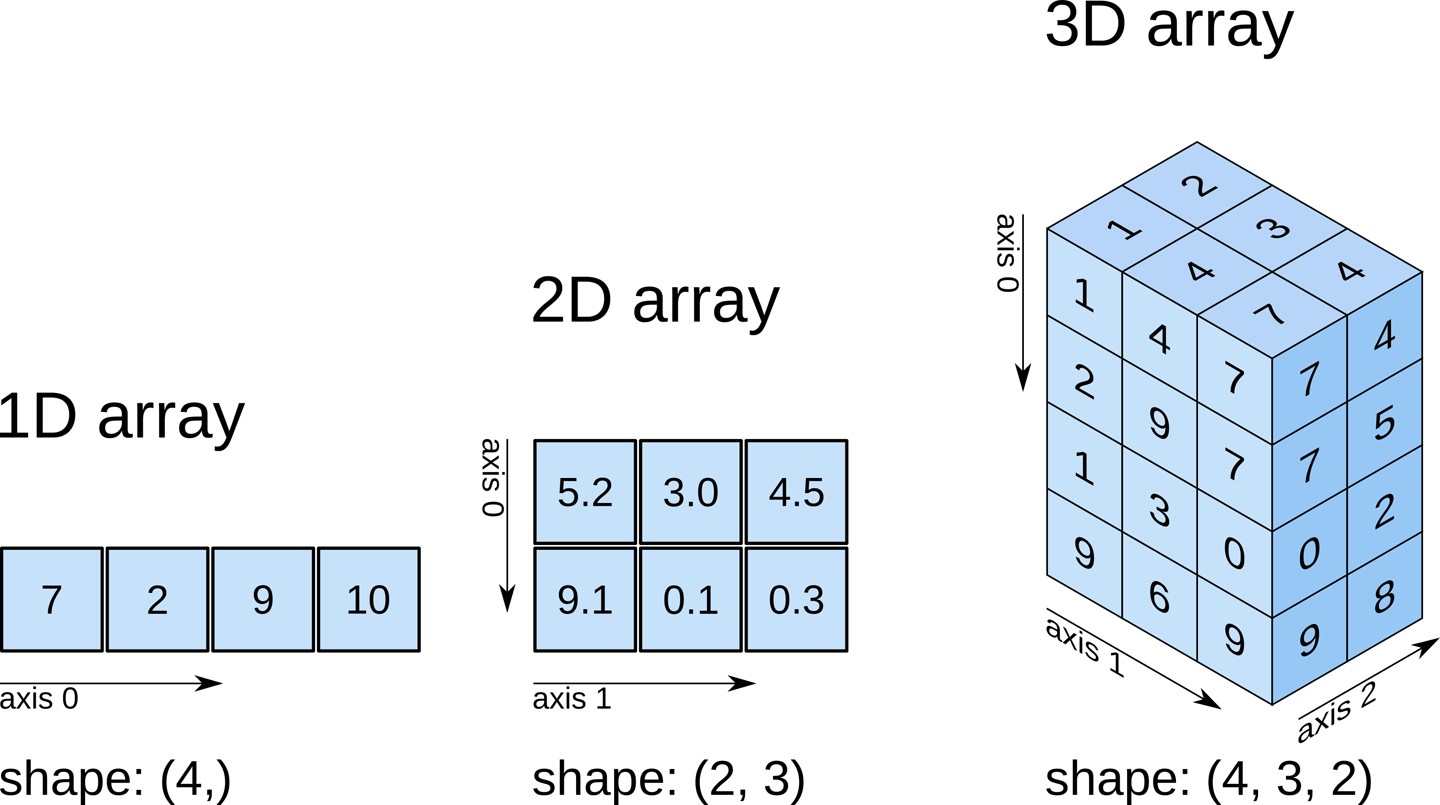

*Image source: [digitalearthafrica.org](https://training.digitalearthafrica.org/en/latest/python_basics/02_numpy.html)*

You will often find multidimensional data is from climate or weather models, satellite products, and anything else that can be shown on a map.

In these data sets, Earth is often divided into **grid cells** in order to simplify the challenge of mapping parameters like ocean temperature or cloud cover all around the world.

As the image below shows, those grid cells often extend in both the horizontal **dimension** (latitude and longitude) as well as the vertical dimension (height, or depth).

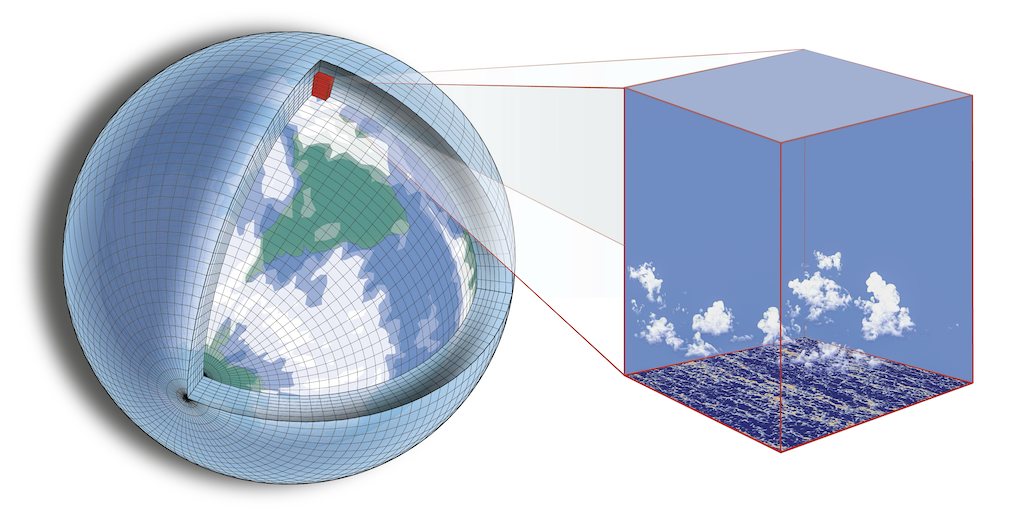

*Image source: [Caltech](https://hr.caltech.edu/news/new-climate-model-be-built-ground-84636)*

**`xarray`** is an important community-developed package that lets us work with gridded data.

In science, gridded data is generally provided using **netCDF files**, which will usually (but not always) have the file extension `.nc`.

Because netCDF files are compressed, you can't simply open them on your computer in TextEdit or Notepad or Excel or Google Sheets. Most of the time, we *have* to write code to look inside them.

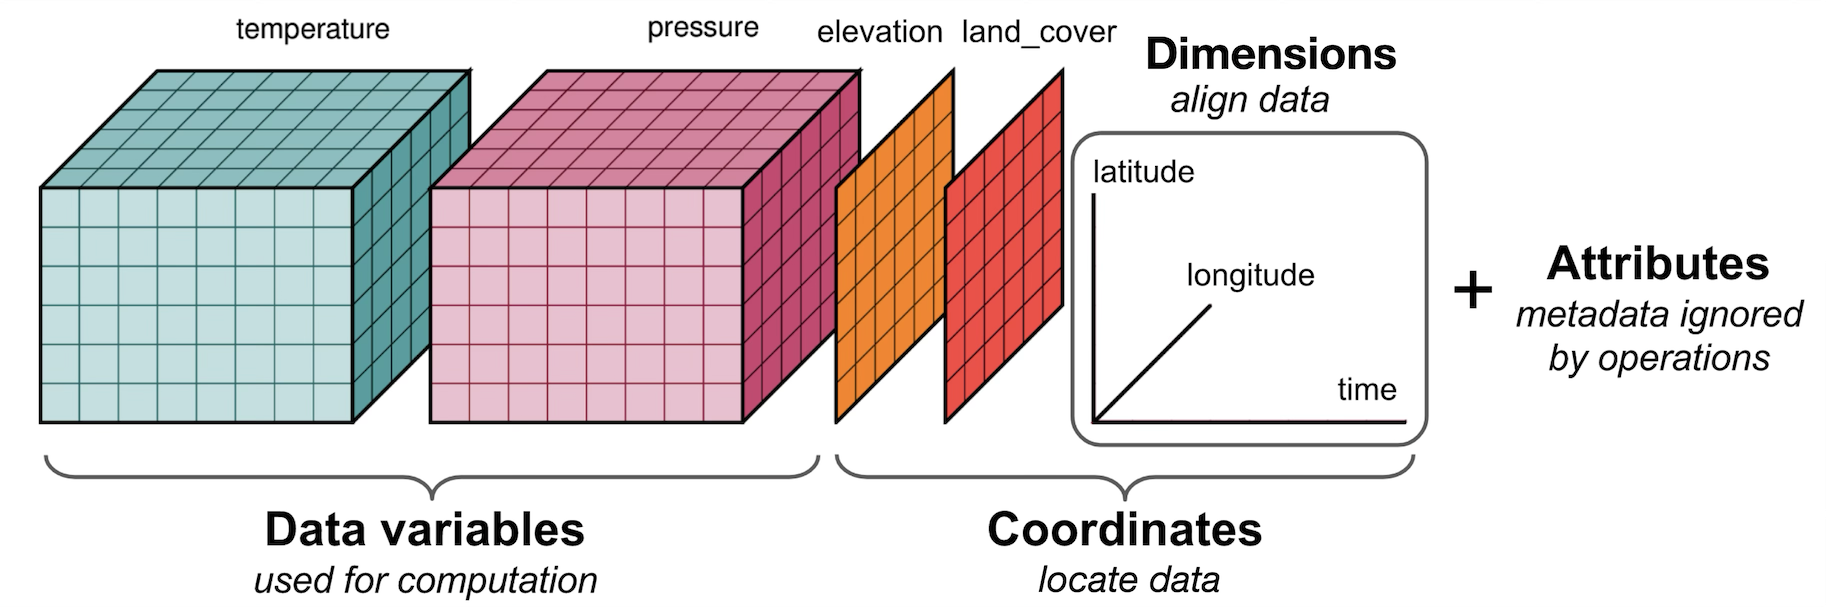

*Image source: [Matthew Rocklin](matthewrocklin.com/blog/work/2018/02/06/hdf-in-the-cloud)*

The image above is what you might see when you open a netCDF file in xarray. The file may contain multiple **variables**: in this example, `temperature`, `pressure`, `elevation`, and `land_cover`.

Those variables will be aligned along a few **dimensions** — in this case, `latitude`, `longitude`, and `time`.

But not every variable will use all the dimensions. Here, temperature is 3-D, while elevation is only 2-D, because the land elevation doesn't change much over time (at least over human time scales!).

The dimensions themselves will have **coordinates**, which are the indices with numbers that let you locate a certain data value *along* a dimension. A set of coordinates might be: latitude = 70°N, longitude = 130°W (which is the same as -130°E), and time = `datetime(2025,7,24)`.

Lastly, netCDF files have **attributes**, which are just simple pieces of text (or "metadata") that may describe how the data set was created, the version of the data set, the units of variables, and other useful info.

---

### Intro to xarray

We've already imported `xarray` at the top using:

```
import xarray as xr
```

***Now, let's download a netCDF file, which is located on [Google Drive here](https://drive.google.com/drive/folders/1dwTMiHTQbkF7NLm41XK-8ZlxoFEuxzN4?usp=sharing).***

This is satellite ocean color data, which gives an estimation of chlorophyll concentration—itself a measure of phytoplankton in the ocean surface. It is from NOAA's VIIRS sensor, provided at a fine resolution of 750 m (0.75 km) over 8-day composites. The data was obtained from [this NOAA ERDDAP server](https://coastwatch.pfeg.noaa.gov/erddap/griddap/erdVHNchla8day.html?chla).

We load the netCDF file into an `xarray` `Dataset` object using the `xr.open_dataset()` function, which takes the filepath (including filename) as its argument. You can find its documentation [here](https://docs.xarray.dev/en/stable/generated/xarray.open_dataset.html).

Note that there is also a similar function called [`xr.open_mfdataset()`](https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html) that opens and combines multiple netCDF files.

In [ ]:
# Load the netCDF file and display its contents
ds = xr.open_dataset('/content/erdVHNchla8day_5d67_fb51_b559_U1753127354803.nc')

display(ds)   # In a notebook, you can also just type "ds" without display()

We see that the file has 4 dimensions, 4 coordinates, 1 variable, and 47 attributes.

One of the dimensions only has a single coordinate value. ***Which is it?***

Use the interactive view to explore the data.

***What is the full name of the `chla` variable, and what units is it in?***

***What is the range of longitudes in the data set, expressed as degrees W (°W)?***

Note that `latitude` values are reversed relative to the usual expectation in netCDF files that coordinate values are in *increasing* order.

To extract a single variable or coordinate, we generally use bracket syntax:

```
dataset_name['variable_name_as_a_string']
```

Another option is to use dot-syntax:

```
dataset_name.variable_name
```

Either way, this will give us an `xarray` `DataArray` object, which is basically a wrapper around a `NumPy` array:



In [ ]:
# Example: extract just the time coordinate
ds['time']

# Note that this gives the same result:
# ds.time

We can retrieve the underlying NumPy array using the following **`.values`** or **`.data`** syntax. In this case, we get a NumPy array filled with `datetime` objects:

In [ ]:
# Convert the data from xarray into NumPy
ds['time'].values

# Note that this gives the same result:
# ds['time'].data

***Can you use code to print the time range of the data — in other words, the start and end dates?***

In [ ]:
# Write your code here:


### Selecting data in xarray

To select one or more values inside an `xarray` variable, we use **`.isel()`** to select by integer index or **`.sel()`** to select by coordinate value:

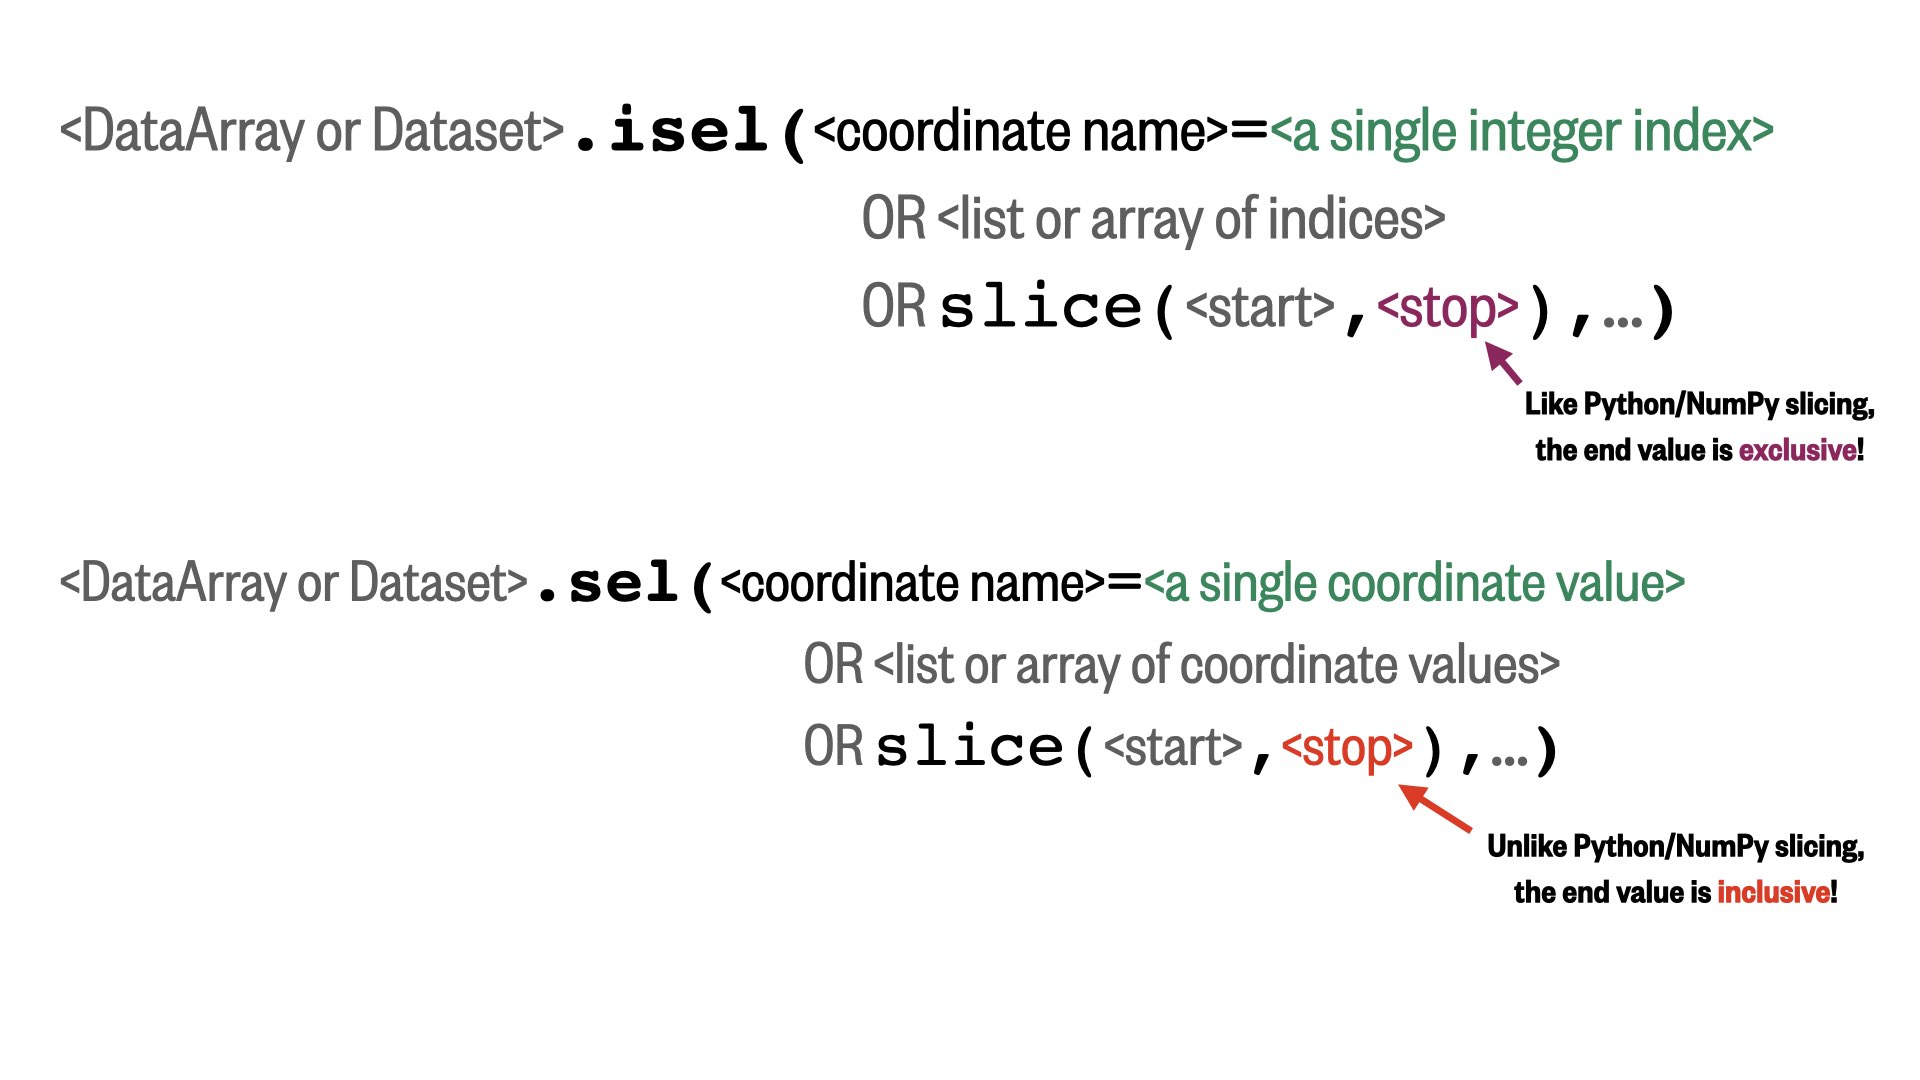

For example, if we wanted to select the most recent `time` value of chlorophyll, we'd use selection by index:

In [ ]:
# Select chla at the most recent time:
ds['chla'].isel(time=-1)

If we knew we wanted to find the chlorophyll on April 1, 2025 at a latitude of 48.00375°N and a longitude of 122.35125°W, we'd write:

In [ ]:
# Select chla at the specific time/lat/lon coordinates:
ds['chla'].sel(time=datetime(2025,4,1),latitude=48.00375,longitude=-122.35125)

# Note the longitude values are negative for degrees W (°W), since the units are °E

Sometimes we need to add an `.item()` to pull a single data value out from `xarray` so we can see it:

In [ ]:
# Select chla at the specific time/lat/lon coordinates:
ds['chla'].sel(time=datetime(2025,4,1),latitude=48.00375,longitude=-122.35125).item()

### Plotting data from xarray

Just like Pandas, `xarray` comes with built-in plotting functions that are similar to those in Matplotlib.

You can usually add **`.plot()`** after an xarray 1-D or 2-D variable to create a simple plot.

For example, let's plot the chlorophyll on the most recent day of data:

In [ ]:
# Create a quick plot
ds['chla'].isel(time=-1).plot()

Notice that the color range seems to be too big. Most of the data has much lower chlorophyll values!

Let's set the color range to have a maximum value of 20 mg/m^3 using the `vmax` argument.

***Can you find Seattle on this map of Puget Sound?***

In [ ]:
# Specify the maximum color range
ds['chla'].isel(time=-1).plot(vmax=20.0)

Just like NumPy arrays or Pandas `DataFrames` and `Series`, you can do math using `xarray` objects!

The beauty of `xarray` is that it will align coordinates to make sure the right values are being added, subtracted, multiplied, or divided.

***Can you calculate how chlorophyll has changed between the first day of data and the most recent day of data, then create a plot of the change?***

In [ ]:
# Write your code here:


# Note that adding "robust=True" inside .plot() removes outlier points outside the
#   2nd and 98th percentiles, making it easier to visualize the data.

### Manipulating xarray data

Similar to Pandas, you can apply NumPy functions like `.mean()` to an `xarray` object.

For example, we can calculate the average across the longitude dimension—in other words, across all longitudes. That leaves time, latitude, and altitude as the remaining dimensions:

```
data.mean(dim='longitude')
```

Let's calculate the average chlorophyll over time within the central Puget Sound region. Here we'll specify two dimensions inside `.mean()`: `latitude` and `longitude`.

Notice how these operations form a chain:

1.   Variable selection, then
2.   Coordinate selection/slicing, then
3.   Dimension reduction (averaging), then
4.   Finally, plotting!



In [ ]:
ds['chla'].sel(longitude=slice(-122.55,-122.3),
               latitude=slice(48,47.50)).mean(dim=['longitude',
                                                   'latitude']).plot()

Another neat quick plotting option is the histogram, `.plot.hist()`, which shows the distribution of chlorophyll values within specified bins:

In [ ]:
ds['chla'].isel(time=-1).plot.hist(bins=100,range=[0,30]);